# Redes neuronales convolucionales

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/irvingvasquez/cv2course_intro_nn/blob/master/10_red_neuronal_convolucional.ipynb)

Una red neuronal convolucional (CNN por sus siglas en inglés, Convolutional Neural Network) es un tipo de red neuronal artificial especialmente diseñada para procesar datos que tienen una estructura de cuadrícula, como imágenes. Está inspirada en el funcionamiento del sistema visual biológico y es muy efectiva en tareas de reconocimiento visual y clasificación de imágenes.

Lo que hace única a una CNN es su capacidad para detectar patrones locales en datos de entrada utilizando filtros convolucionales. Estos filtros son pequeñas matrices numéricas que se deslizan sobre la imagen de entrada para realizar operaciones de convolución. Esta operación de convolución permite a la red extraer características relevantes de la imagen, como bordes, texturas o formas.

En este notebook implementaremos una capa convolucional usando python y numpy. Pondremos énfasis en la implementación de la convolución a partir de los hiper-parámetros de la capa convolucional. En particular usaremos la variante de correlación cruzada que se define de la siguiente forma:

$$
	G[i,j] =  \sum_{u=-k}^{k} \sum_{v=-k}^{k} H[u,v] I[i+u,j+v]
$$
donde $I$ es la entrada y $H$ el kernel.

Visualmente tendríamos algo similar a la siguiente figura. Donde la imagen original esta en azul y la imagen resultante está en verde.

<img src="https://github.com/irvingvasquez/cv2course_intro_nn/blob/master/files/same_padding_no_strides_00.png?raw=1">

Como entrada usaremos una imagen popular en visión computacional, Lenna. Y, si todo sale bien, la salida deberá realizar la detección de bordes verticales.

<img src="https://github.com/irvingvasquez/cv2course_intro_nn/blob/master/files/Lenna.png?raw=1">

In [1]:
# Paquetes
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Dimensiones de la imagen: (256, 256)
Tipo de datos de la matriz: uint8
Matriz de la imagen:
[[226 223 226 ... 230 232 211]
 [226 223 226 ... 230 232 211]
 [226 224 226 ... 221 216 185]
 ...
 [ 90  92  97 ... 140 158 162]
 [ 86  92  95 ... 154 171 171]
 [ 83  94  95 ... 167 178 183]]


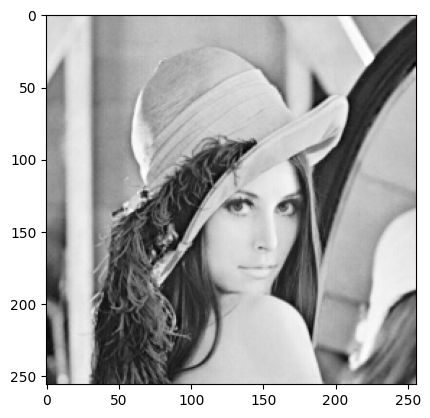

In [6]:
# Ruta de la imagen
ruta_imagen = "/content/Lenna.png"

# Abrir la imagen con PIL
imagen_pil = Image.open(ruta_imagen)

# Convertir la imagen a una matriz de NumPy
imagen_numpy = np.array(imagen_pil)
array_transposed = imagen_numpy.transpose((2, 0, 1))
red_channel = array_transposed[0]

# Mostrar información sobre la matriz de la imagen
print("Dimensiones de la imagen:", red_channel.shape)
print("Tipo de datos de la matriz:", red_channel.dtype)

# Mostrar la matriz de la imagen (opcional)
print("Matriz de la imagen:")
print(red_channel)

plt.imshow(red_channel, cmap='gray')

## Implementación del kernel

El kernel ($H$) es una matriz cuadrada cuyas dimensiones son $(2k+1) \times (2k+1)$, donde $k$ es un número entero positivo. Al utilizar el parámetro $k$ aseguramos que el kernel tenga tamaño impar. Los elementos de $k$ pueden tener valores arbitrarios de acuerdo al efecto que deseemos (los veremos más tarde). Por ahora, diremos que es deseable que la sumatoria de sus elementos sea igual a 1, si la sumatoria no es igual a 1 la imagen de salida será escalada.

En este ejemplo, supondremos que $k=1$ y que los elementos de $H$ simulan un filtro detector de bordes verticales.

[[-0.33333334  0.          0.33333334]
 [-0.33333334  0.          0.33333334]
 [-0.33333334  0.          0.33333334]]


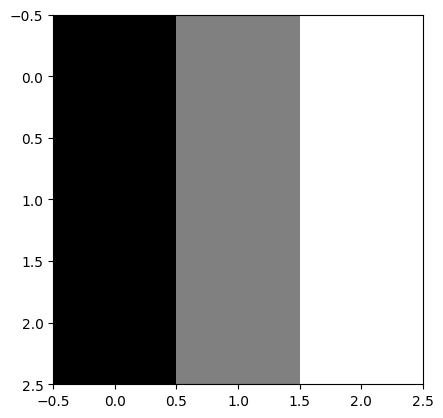

In [7]:
# Definir kernel (filtro)
k = 1
tamano = 2 * k + 1
kernel = np.zeros((tamano, tamano), np.float32) / (tamano**2)
kernel[0][0] = -1.0/3
kernel[1][0] = -1.0/3
kernel[2][0] = -1.0/3

kernel[0][2] = 1.0/3
kernel[1][2] = 1.0/3
kernel[2][2] = 1.0/3

# imprimir el filtro
print(kernel)
plt.imshow(kernel, cmap='gray')
plt.show()

## Implementar correlación-cruzada

Recordando que:

$$
	G[i,j] =  \sum_{u=-k}^{k} \sum_{v=-k}^{k} H[u,v] I[i+u,j+v]
$$
donde $I$ es la imagen de entrada y $H$ el kernel.

### Padding

En este ejemplo usaremos padding p=0. Esto significa que no se agregan capas al rededor de la imagen de entrada.

![](https://github.com/irvingvasquez/cv2course_intro_nn/blob/master/same_padding_no_strides_00.png?raw=1)

In [10]:
import numpy as np

def correlacionPixel(H, I, i, j):
    # Obtiene dimensiones del kernel y de la imagen
    doskmas1, _ = H.shape
    k = (doskmas1 - 1) // 2  # Calcula k basado en el tamaño del kernel
    m, n = I.shape
    sumatoria = 0

    # Verifica que los índices estén dentro de los límites válidos
    if k <= i < m-k and k <= j < n-k:
        # Realiza la sumatoria de la correlación
        for di in range(-k, k+1):
            for dj in range(-k, k+1):
                sumatoria += I[i+di, j+dj] * H[di+k, dj+k]
    else:
        # Retorna cero si está en el borde
        return 0
    return int(sumatoria)

def correlacionCruzada(H, I):
    doskmas1, _ = H.shape
    k = (doskmas1 - 1) // 2  # Calcula k basado en el tamaño del kernel
    m, n = I.shape

    # Crea una matriz G del mismo tamaño que I, inicializada a cero
    G = np.zeros_like(I)

    # Aplica la correlación para cada elemento de I dentro de los límites válidos
    for i in range(k, m-k):
        for j in range(k, n-k):
            G[i, j] = correlacionPixel(H, I, i, j)

    return G

# Ejemplo de uso
I = np.random.randint(0, 256, (10, 10))  # Genera una imagen aleatoria de 10x10
H = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Un kernel de ejemplo para enfoque

G = correlacionCruzada(H, I)
print(G)


[[   0    0    0    0    0    0    0    0    0    0]
 [   0  669  -86   70  554  287  274  -51  793    0]
 [   0  445  630 -478  226    3  414  -89  527    0]
 [   0 -134   47  447 -378 -352 -184  106    8    0]
 [   0  134  246  207   -9  730   74  805 -326    0]
 [   0  156  637   32  348 -215  453 -398  116    0]
 [   0 -121 -704  753 -584  484  498  -62  617    0]
 [   0  -80  802 -155  726  288 -197  814 -479    0]
 [   0 -113  333   62 -560   53  320 -259 -308    0]
 [   0    0    0    0    0    0    0    0    0    0]]


In [11]:
correlacionPixel(H = kernel, I = red_channel, i=1, j=1)

0

## Prueba

Ahora haremos la convolución sobre nuestra imagen de entrada. Además, aunque no es muy común en las redes, En algunos casos se puede aplicar una función de activación. Solo para propósitos de prueba, pasaremos el resultado por una función relu. Si todo va bien debes obtener al final una imagen como esta:

<img src="https://github.com/irvingvasquez/cv2course_intro_nn/blob/master/files/ccnout.png?raw=1">

<ipython-input-10-f1aa586a3e5a>:32: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  G[i, j] = correlacionPixel(H, I, i, j)
<ipython-input-10-f1aa586a3e5a>:32: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -3 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  G[i, j] = correlacionPixel(H, I, i, j)
<ipython-input-10-f1aa586a3e5a>:32: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired re

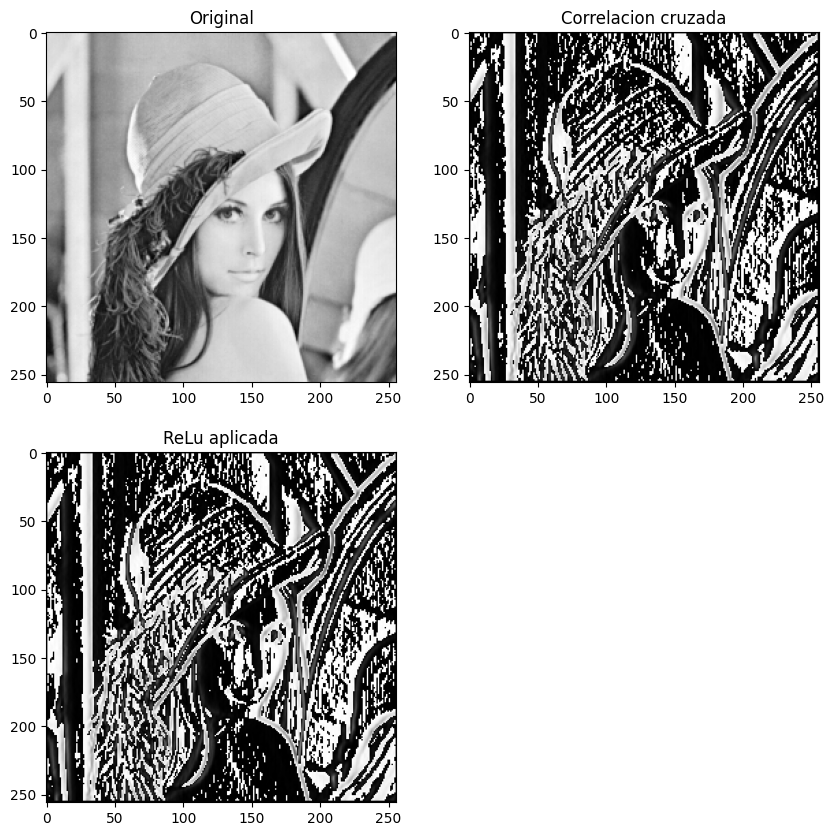

In [13]:
#aplicar la correlación cruzada
resultado = correlacionCruzada(H = kernel, I = red_channel)
relu_activated = np.maximum(0, resultado)

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(red_channel, cmap = 'gray')
plt.title('Original')

plt.subplot(222)
plt.imshow(resultado, cmap = 'gray')
plt.title('Correlacion cruzada')

plt.subplot(223)
plt.imshow(relu_activated, cmap = 'gray')
plt.title('ReLu aplicada')

plt.show()

Contesta las siguientes preguntas:

- ¿Por que en la imagen relu_activated solo se ven algunos bordes verticales y no todos?
el kernel que hemos definido es un filtro de detección de bordes verticales que resalta transiciones de oscuro a claro tomando la posición de izquierda a derecha, en este caso la función (relu_activated = np.maximun(0,resultado)) elimina el valor negativo resultante de correlación cruzada, lo que significa que solo los bordes que resulten en valores prositivos despues de la correlación serán visibles.

- ¿Que padding debemos utilizar para evitar los contornos vacíos en la imagen de salida?
para poder lograr que la imagen de salida tenga el mismo tamaño que la imagen de entrada y así evitatr la reducción en las dimencsiones que conlleva a la perdida de información en los bordes, se debe de usar un padding tipo same. es decir debemos de de agregar suficinete padding alrededor de la imagen original oara que cada pixel tenga la oportunidad de estar en el centro de kernel en alguún punto, permitiendo que el kernel se aplique de manera completa alrededor de todos los borders

Ve más alla, puedes incluir max pooling 2 con stride 2?

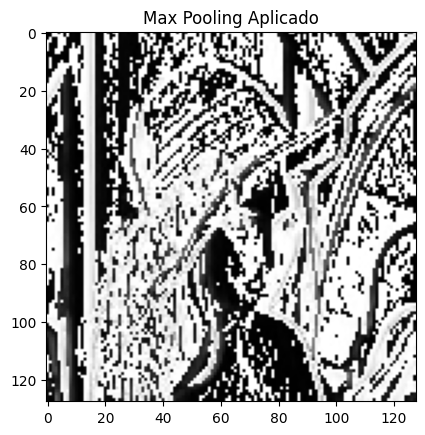

In [14]:
def max_pooling_2x2(image):

    out_height = image.shape[0] // 2
    out_width = image.shape[1] // 2
    pooled_image = np.zeros((out_height, out_width))
    for i in range(out_height):
        for j in range(out_width):
            pooled_image[i, j] = np.max(image[i*2:(i+1)*2, j*2:(j+1)*2])
    return pooled_image

# Aplicar max pooling
max_pooled_image = max_pooling_2x2(relu_activated)

plt.imshow(max_pooled_image, cmap='gray')
plt.title('Max Pooling Aplicado')
plt.show()
